In [1]:
!pip install cmocean

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import os

import cmocean.cm as cm

os.environ["CARTOPY_USER_BACKGROUNDS"] = "Background/"

### Load CMEMS Sea Surface Height (SSH) Data

In [3]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["sea_surface_height"].to_dask()
display(ds)

<xarray.Dataset>
Dimensions:    (time: 8901, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(5, 720, 2), meta=np.ndarray>
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
    lon_bnds   (longitude, nv) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

### Select the first year (1993) for analysis

In [4]:
dsl = list(ds.groupby("time.year"))
year, ds_year = dsl[0] 
display(ds_year)

<xarray.Dataset>
Dimensions:    (time: 365, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(5, 720, 2), meta=np.ndarray>
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
    lon_bnds   (longitude, nv) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 1993-12-31
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

### Map Yearly SLA and ADT data
- SLA: Sea Level Anomaly
- ADT: The Absolute Dynamic Topography

<xarray.DataArray 'adt' (latitude: 720, longitude: 1440)>
dask.array<mean_agg-aggregate, shape=(720, 1440), dtype=float64, chunksize=(720, 1440), chunktype=numpy.ndarray>
Coordinates:
    crs        int32 ...
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

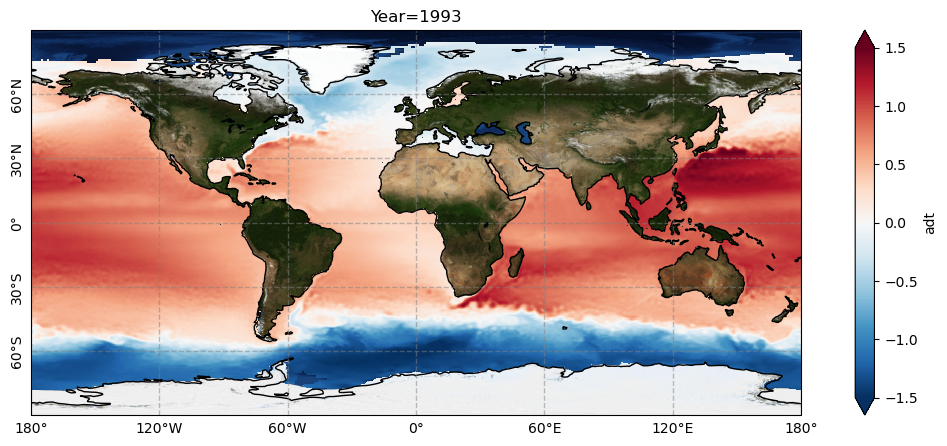

In [5]:
adt_mean = ds_year.adt.mean("time")
display(adt_mean)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.background_img(name='BM', resolution='medium')
ax.coastlines()
adt_mean.plot.imshow(ax=ax,vmin=-1.5,vmax=1.5,cmap="RdBu_r")
ax.set_title(f"Year={year}")

gl = ax.gridlines(draw_labels=True, linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.ylabel_style = {'rotation': 90}

<xarray.DataArray 'sla' (latitude: 720, longitude: 1440)>
dask.array<mean_agg-aggregate, shape=(720, 1440), dtype=float64, chunksize=(720, 1440), chunktype=numpy.ndarray>
Coordinates:
    crs        int32 ...
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

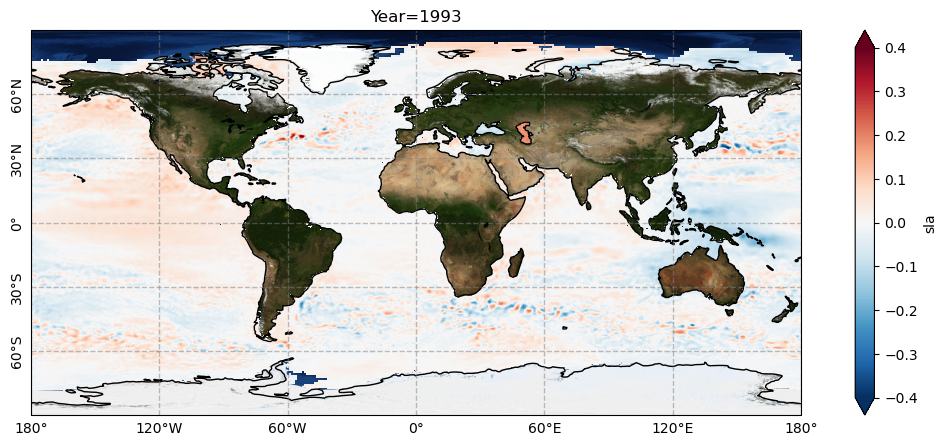

In [6]:
sla_mean = ds_year.sla.mean("time")
display(sla_mean)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.background_img(name='BM', resolution='medium')
ax.coastlines()
sla_mean.plot.imshow(ax=ax,vmin=-0.4,vmax=0.4,cmap="RdBu_r")
ax.set_title(f"Year={year}")

gl = ax.gridlines(draw_labels=True, linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.ylabel_style = {'rotation': 90}

### Calculate Eddy Kinetic Energy
- Eddy Kinetic Energy mplement:
$$EKE = \frac{1}{2}[(u-\bar{u})^2+(v-\bar{v})^2]$$

In [7]:
uv = ds_year[["ugosa","vgosa"]]
uv_mean = uv.mean("time")
eke = 0.5*((uv.ugosa - uv_mean.ugosa)**2+(uv.vgosa - uv_mean.vgosa)**2)
eke.attrs = {'long_name': 'Eddy Kinetic Energy', 
            'mate': 'EKE', 'units':r'$(m/s)^2$'}

display(eke)

<xarray.DataArray (time: 365, latitude: 720, longitude: 1440)>
dask.array<mul, shape=(365, 720, 1440), dtype=float64, chunksize=(5, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 1993-12-31
Attributes:
    long_name:  Eddy Kinetic Energy
    mate:       EKE
    units:      $(m/s)^2$

(<matplotlib.patches.Rectangle at 0x7f2b64109990>,
 (<matplotlib.patches.ConnectionPatch at 0x7f2b64109e10>,
  <matplotlib.patches.ConnectionPatch at 0x7f2b64108e80>))

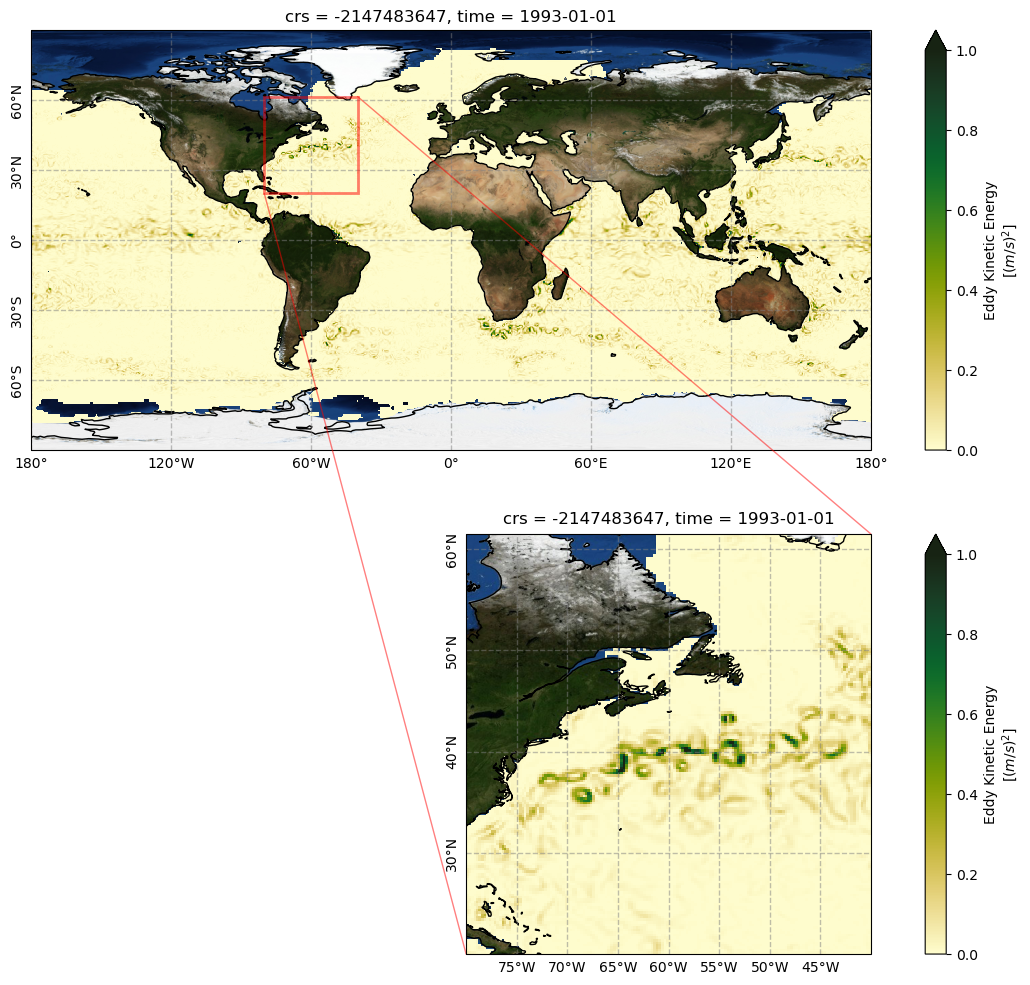

In [8]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.background_img(name='BM', resolution='medium')
ax.coastlines()
eke.isel(time=0).plot.imshow(ax=ax, vmin=0, vmax=1, cmap=cm.speed)

gl = ax.gridlines(draw_labels=True, linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.ylabel_style = {'rotation': 90}

ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
ax2.background_img(name='BM', resolution='medium')
ax2.coastlines()
ax2.set_extent([-80,-40,20,60])
eke.isel(time=0).plot.imshow(ax=ax2, vmin=0, vmax=1, cmap=cm.speed)

gl = ax2.gridlines(draw_labels=True, linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.ylabel_style = {'rotation': 90}

ax.indicate_inset_zoom(ax2, edgecolor="r",linewidth=2)